In [1]:
import random

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import norm

# Kriging Calculations for 3 Observation Points

In [4]:
dobs = np.array([2.,4.,6.])
dest = np.array([3.,5.,8.])
yobs = np.array([30,50,20]).reshape((-1,1))

In [5]:
C = lambda h: 100*np.exp(-0.3*h)

In [6]:
def kriging(dobs,yobs,dest,cov):
  #Step 1: Distance Matrices
  Dobs = np.abs(dobs-dobs.reshape((-1,1)))
  Dest = np.abs(dest-dobs.reshape((-1,1)))
  #Step 3: Covariance Matrices
  Cobs = cov(Dobs)
  Cest = cov(Dest)
  #Step 4: Adding rows of 1
  unit = np.ones(dobs.size+1)
  unit[-1] = 0
  LHS = np.concatenate((Cobs,np.ones(dobs.size).reshape((-1,1))),axis=1)
  LHS = np.concatenate((LHS,unit.reshape((1,-1))),axis=0)
  RHS = np.concatenate((Cest,np.ones(dest.size).reshape((1,-1))),axis=0)
  #Step 5: Solving for lambdas
  lamda = np.linalg.solve(LHS,RHS)
  #Step 6: Calculation of estimated values
  yest = (yobs*lamda[:-1,:]).sum(axis=0)
  #Step 7: Calculation of error
  err_var = 100-lamda[-1,:]-(Cest*lamda[:-1,:]).sum(axis=0)
  err_std = np.sqrt(err_var)
  yest_min = yest-err_std*1.96
  yest_max = yest+err_std*1.96
  return yest, yest_min, yest_max, err_std

In [7]:
dest_new = np.linspace(0,9,1001)

In [8]:
yest,yemin,yemax,_ = kriging(dobs,yobs,dest_new,C)

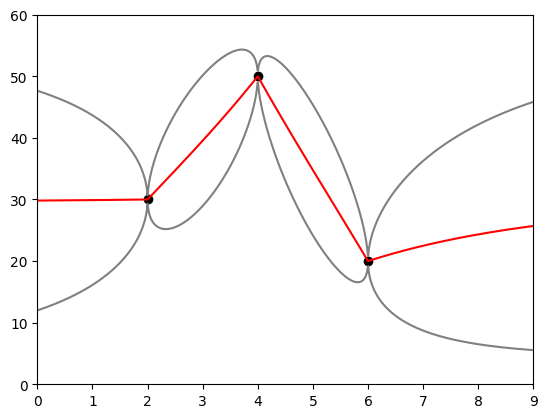

In [9]:
plt.scatter(dobs,yobs,c='k')
plt.plot(dest_new,yest,c='r')
# for i in range(3):
#   plt.vlines(dest[i],yest_min[i],yest_max[i])
# plt.plot(dest_new,ye,'b')
plt.plot(dest_new,yemin,'gray')
plt.plot(dest_new,yemax,'gray')
plt.xlim((0,9))
plt.ylim((0,60))
plt.show()

# Simulation

In [34]:
dobs = np.array([2.,4.,6.])
dest = np.array([3.,5.,8.])
yobs = np.array([30,50,20]).reshape((-1,1))

In [35]:
dobs_copy = dobs.copy()
dest_copy = dest.copy()
yobs_copy = yobs.copy()

In [36]:
dest_list = dest.tolist()

In [37]:
for i in range(3):
    index = np.random.randint(3-i)
    dest_new_new = np.array([dest_list.pop(index)])
    yest_copy,_,_,err_std = kriging(dobs_copy,yobs_copy,dest_new_new,C)
    dobs_copy = np.append(dobs_copy,dest_new_new)
    guess = yest_copy+err_std*norm.ppf(random.uniform(0,1))
    # print(guess)
    yobs_copy = np.append(yobs_copy.flatten(),guess).reshape((-1,1))

In [38]:
ysim = yobs_copy.flatten()[3:]

In [39]:
dsim = dobs_copy[3:]

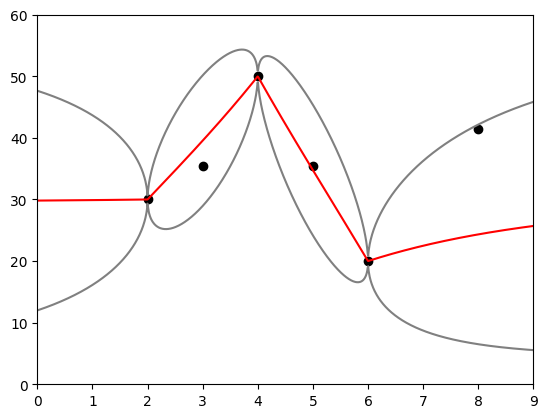

In [40]:
plt.scatter(dobs,yobs,c='k')
plt.scatter(dsim,ysim,c='k')
plt.plot(dest_new,yest,c='r')
# plt.plot(dest_new,ye,'b')
plt.plot(dest_new,yemin,'gray')
plt.plot(dest_new,yemax,'gray')
plt.xlim((0,9))
plt.ylim((0,60))
plt.show()